#Data Augmentation using CNN

**Objective:** Fix Overfitting

**Category Type:** Flowers

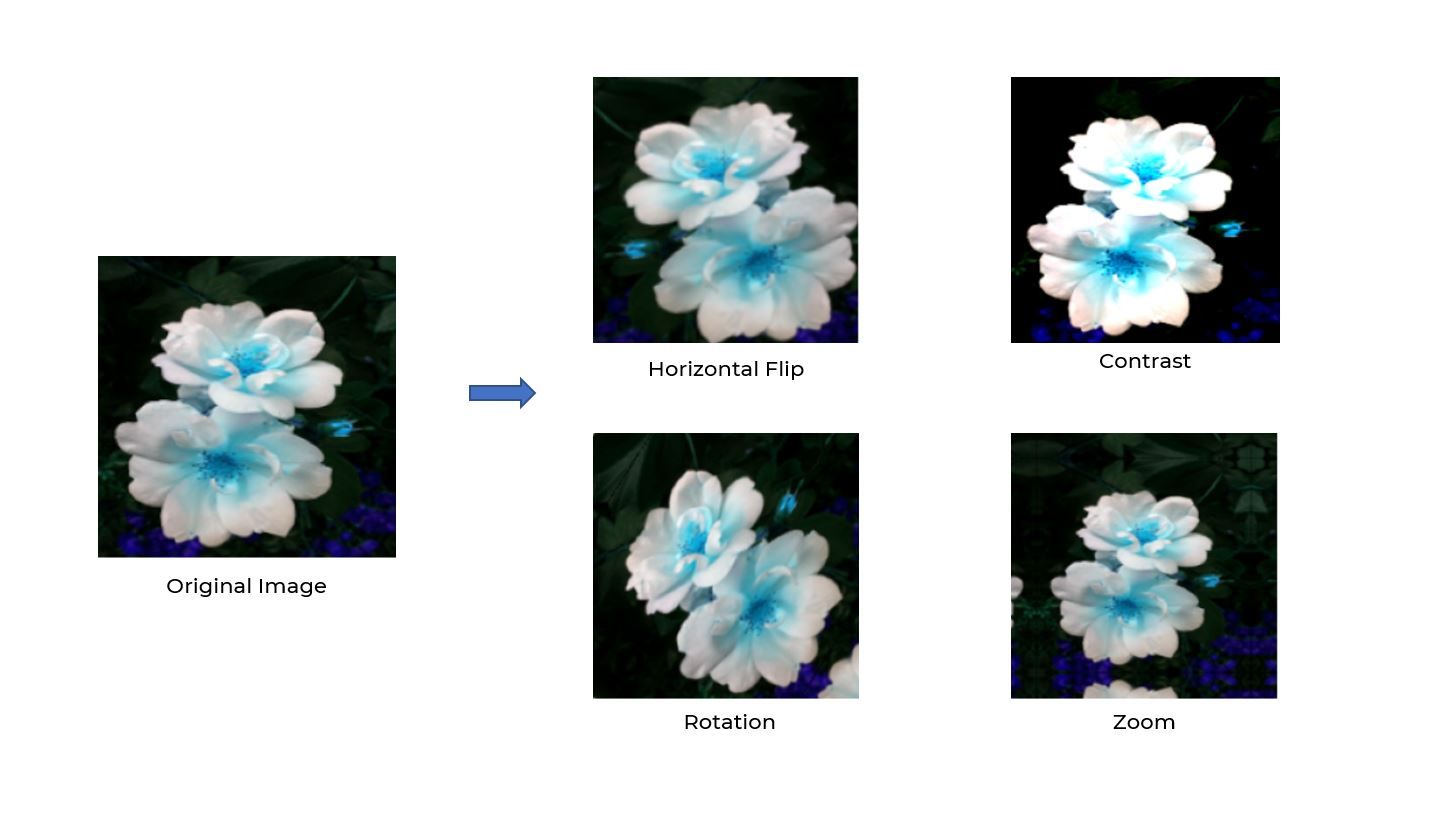

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

These three imports are also important here!

In [2]:
import cv2
import PIL
import os

`cache_dir` is the directory you want to store the dataset.

`untar=True` is used for extracting the zip files

###Load the Dataset

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

Using Pathlib to make directories OS-friendly

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/16645809126_613b1e3ebe_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/14084211971_0f921f11fe_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/405035580_94b793e71d.jpg'),
 PosixPath('datasets/flower_photos/tulips/13530690445_9f1f5cf43a_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8713387500_6a9138b41b_n.jpg')]

Total Images stored in the Dataset:

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

Displaying all pictures of Roses folder

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6111589202_8b9555364c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/921138131_9e1393eb2b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7251352826_69b62cba2c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2682566502_967e7eaa2a.jpg')]

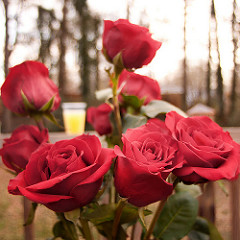

In [9]:
PIL.Image.open(str(roses[10]))

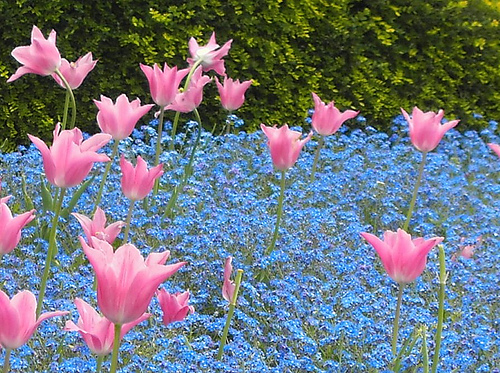

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[7]))

Creating dictionary to store Images and their respective Labels

In [11]:
flowers_dictionary = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_library = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [13]:
flowers_dictionary['roses'][:3]

[PosixPath('datasets/flower_photos/roses/6111589202_8b9555364c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/921138131_9e1393eb2b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9300754115_dd79670066_n.jpg')]

In [14]:
str(flowers_dictionary['dandelion'][3])

'datasets/flower_photos/dandelion/8978962053_0727b41d26.jpg'

Transforming each image dictionary into a numpy array using OpenCV

In [15]:
img = cv2.imread(str(flowers_dictionary['dandelion'][3]))
img

array([[[ 1, 30, 15],
        [ 1, 30, 15],
        [ 2, 31, 16],
        ...,
        [ 0, 90, 54],
        [ 2, 89, 55],
        [ 1, 88, 54]],

       [[ 0, 28, 15],
        [ 0, 29, 14],
        [ 1, 30, 15],
        ...,
        [ 1, 91, 55],
        [ 1, 88, 54],
        [ 1, 88, 54]],

       [[ 1, 27, 14],
        [ 1, 27, 13],
        [ 0, 29, 14],
        ...,
        [ 2, 92, 56],
        [ 0, 90, 55],
        [ 1, 88, 54]],

       ...,

       [[ 0, 18,  1],
        [ 0, 19,  2],
        [ 0, 19,  2],
        ...,
        [ 1, 69, 38],
        [ 0, 70, 39],
        [ 0, 71, 38]],

       [[ 1, 20,  3],
        [ 1, 20,  3],
        [ 1, 20,  3],
        ...,
        [ 1, 69, 38],
        [ 2, 70, 39],
        [ 0, 71, 38]],

       [[ 1, 22,  7],
        [ 2, 22,  9],
        [ 2, 20,  7],
        ...,
        [ 1, 71, 40],
        [ 1, 71, 40],
        [ 0, 70, 40]]], dtype=uint8)

In [16]:
img.shape

(313, 500, 3)

As all the images are not in the same size (width x height), we need to resize it.

In [17]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [18]:
#Defining X, y as two empty list where the resized images will be stored
X, y = [], []

for flower_name, images in flowers_dictionary.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_library[flower_name])

In [19]:
X = np.array(X)
y = np.array(y)

###Train Test Split



In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Scaling Images

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

##Building CNN

In [22]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 14s 19ms/step - loss: 1.3947 - accuracy: 0.3950
Epoch 2/30
86/86 [==============================] - 2s 19ms/step - loss: 0.9897 - accuracy: 0.6072
Epoch 3/30
86/86 [==============================] - 2s 19ms/step - loss: 0.8186 - accuracy: 0.6835
Epoch 4/30
86/86 [==============================] - 2s 19ms/step - loss: 0.5922 - accuracy: 0.7834
Epoch 5/30
86/86 [==============================] - 2s 21ms/step - loss: 0.3658 - accuracy: 0.8739
Epoch 6/30
86/86 [==============================] - 2s 21ms/step - loss: 0.2369 - accuracy: 0.9248
Epoch 7/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1395 - accuracy: 0.9608
Epoch 8/30
86/86 [==============================] - 2s 19ms/step - loss: 0.1032 - accuracy: 0.9717
Epoch 9/30
86/86 [==============================] - 2s 19ms/step - loss: 0.0637 - accuracy: 0.9811
Epoch 10/30
86/86 [==============================] - 2s 19ms/step - loss: 0.0359 - accuracy: 0.9909
Epoch 11

Wow! The training accuracy comes 99%. However, there is a risk of getting overfitting problem later.

In [23]:
model.evaluate(X_test_scaled, y_test)


29/29 [==============================] - 1s 14ms/step - loss: 2.9069 - accuracy: 0.6176


[2.906911849975586, 0.6176470518112183]

So, you can clearly see evaluation accuracy is only 64% despite of having huge accuracy in training.

In [24]:
prediction = model.predict(X_test_scaled)
prediction

29/29 [==============================] - 0s 9ms/step


array([[  1.4494109 ,   4.614359  ,   5.7343206 ,  -2.87163   ,
         -6.832865  ],
       [ 14.970953  ,  14.212279  , -18.53      ,   3.642239  ,
         15.244011  ],
       [ -3.1686704 ,  -0.30872858,   3.0397205 ,   1.6458915 ,
          6.9533997 ],
       ...,
       [  3.3550518 ,   1.0419086 ,  -1.1198485 ,   7.017459  ,
         -0.8212214 ],
       [ 21.160162  ,  -5.740253  ,   0.8518219 ,  -7.0624814 ,
         17.021448  ],
       [ -8.317133  ,   2.1257303 ,  10.159587  ,   7.2453732 ,
         -2.32484   ]], dtype=float32)

In [25]:
score = tf.nn.softmax(prediction[3])

Softmax is used to convert a vector of raw scores (also known as logits) into a probability distribution over multiple classes

In [26]:
#argmax identifies the biggest number out of the array
np.argmax(score)

4

This 2 means prediction[0] has the biggest value in index 2.

In [27]:
y_test[3]

4

Here the score(X-test-scaled) matched with (y_test) as 4 (tulips).

But remember, the test accuracy is quite average. You'll see mismatch while taking more experiments. Let's take one more example.


In [28]:
score = tf.nn.softmax(prediction[2])
np.argmax(score)

4

In [29]:
y_test[2]

2

In this example, both are not matched!

Now's the concern is to address the overfit and increase test accuracy.


##Data Augmentation

Objective:

Improving Test Accuracy

In [30]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

Original Image

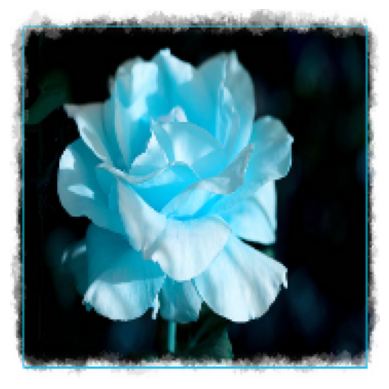

In [31]:
plt.axis('off')
plt.imshow(X[4])

Newly Generated Image using Data Augmentation

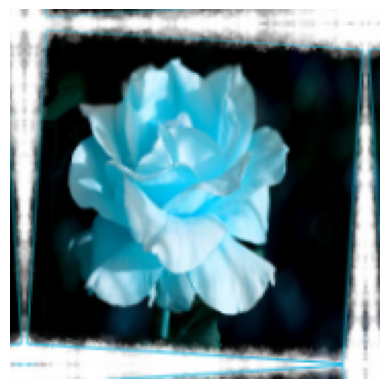

In [32]:
plt.axis('off')
plt.imshow(data_aug(X)[4].numpy().astype('uint8'))

In [33]:
num_classes = 5

model = Sequential([
  data_aug,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 5s 28ms/step - loss: 1.3933 - accuracy: 0.4037
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0893 - accuracy: 0.5698
Epoch 3/30
86/86 [==============================] - 2s 27ms/step - loss: 0.9962 - accuracy: 0.6047
Epoch 4/30
86/86 [==============================] - 2s 29ms/step - loss: 0.8917 - accuracy: 0.6453
Epoch 5/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8262 - accuracy: 0.6886
Epoch 6/30
86/86 [==============================] - 2s 27ms/step - loss: 0.7833 - accuracy: 0.6951
Epoch 7/30
86/86 [==============================] - 2s 27ms/step - loss: 0.7531 - accuracy: 0.7129
Epoch 8/30
86/86 [==============================] - 2s 27ms/step - loss: 0.7270 - accuracy: 0.7137
Epoch 9/30
86/86 [==============================] - 3s 30ms/step - loss: 0.6951 - accuracy: 0.7376
Epoch 10/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6645 - accuracy: 0.7493
Epoch 11/

In [34]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 10ms/step - loss: 0.8763 - accuracy: 0.7222


[0.8762943744659424, 0.7222222089767456]

##Finally, the test accuracy has increased from 64% to 72% by using Data Augmentation!